<a href="https://colab.research.google.com/github/Jee-9/Study/blob/main/TPS09_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')


# import os
# import joblib


import matplotlib
from matplotlib import ticker

# pd.set_option('display.max_rows', None)
# pd.set_option('display.max_columns', None)
# pd.set_option('float_format', '{:f}'.format)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
train_path = '/content/drive/MyDrive/DATA/Kaggle_TPS09/train.csv'
test_path = '/content/drive/MyDrive/DATA/Kaggle_TPS09/test.csv'
sample_path = '/content/drive/MyDrive/DATA/Kaggle_TPS09/sample_solution.csv'

train = pd.read_csv(train_path)
test = pd.read_csv(test_path)
sample_submission = pd.read_csv(sample_path)

In [ ]:
target = train['claim']

train.drop(columns = ['id', 'claim'], inplace = True)
test.drop(columns = 'id', inplace = True)

In [ ]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
id,957919.0,4.789590e+05,2.765275e+05,0.000000e+00,2.394795e+05,4.789590e+05,7.184385e+05,9.579180e+05
f1,942672.0,9.020086e-02,4.356374e-02,-1.499100e-01,7.022700e-02,9.013500e-02,1.165000e-01,4.151700e-01
f2,942729.0,3.459637e-01,1.462507e-01,-1.904400e-02,2.830500e-01,3.891000e-01,4.584500e-01,5.189900e-01
f3,942428.0,4.068744e+03,6.415829e+03,-9.421700e+03,4.184300e+02,1.279500e+03,4.444400e+03,3.954400e+04
f4,942359.0,2.012140e-01,2.125103e-01,-8.212200e-02,3.508650e-02,1.370000e-01,2.971000e-01,1.319900e+00
...,...,...,...,...,...,...,...,...
f115,942360.0,1.208876e+00,1.149588e-01,9.052700e-01,1.146800e+00,1.177200e+00,1.242000e+00,1.886700e+00
f116,942330.0,4.276905e+16,6.732441e+16,-8.944400e+15,2.321100e+14,1.327500e+16,5.278700e+16,3.249900e+17
f117,942512.0,3.959205e+03,3.155992e+03,-4.152400e+02,1.306200e+03,3.228000e+03,6.137900e+03,1.315100e+04
f118,942707.0,5.592672e-01,4.084261e-01,-1.512400e-01,2.765600e-01,4.734400e-01,7.462100e-01,2.743600e+00


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 957919 entries, 0 to 957918
Columns: 120 entries, id to claim
dtypes: float64(118), int64(2)
memory usage: 877.0 MB


In [ ]:
train.isna().sum() # missing values

f1      15247
f2      15190
f3      15491
f4      15560
f5      15405
        ...  
f114    15438
f115    15559
f116    15589
f117    15407
f118    15212
Length: 118, dtype: int64

In [ ]:
missing_train_df = pd.DataFrame(train.isna().sum())

In [ ]:
missing_train_df

,0
f1,15247
f2,15190
f3,15491
f4,15560
f5,15405


In [ ]:
# missing values percentage df에 담기

missing_train_df = pd.DataFrame(train.isna().sum())
missing_train_df['percent'] = missing_train_df/train.shape[0]

In [ ]:
missing_train_df

,0,percent
f1,15247,0.015917
f2,15190,0.015857
f3,15491,0.016172
f4,15560,0.016244
f5,15405,0.016082
...,...,...
f114,15438,0.016116
f115,15559,0.016243
f116,15589,0.016274
f117,15407,0.016084


In [ ]:
missing_test_df = pd.DataFrame(test.isna().sum())
missing_test_df['percent'] = missing_test_df/test.shape[0]

In [ ]:
missing_test_df

,0,percent
f1,7812,0.015831
f2,7891,0.015991
f3,7795,0.015796
f4,7733,0.015671
f5,7877,0.015962
...,...,...
f114,7942,0.016094
f115,7977,0.016165
f116,8083,0.016380
f117,7763,0.015731


In [ ]:
missing_train_df.index[2]

'f3'

## Barplot

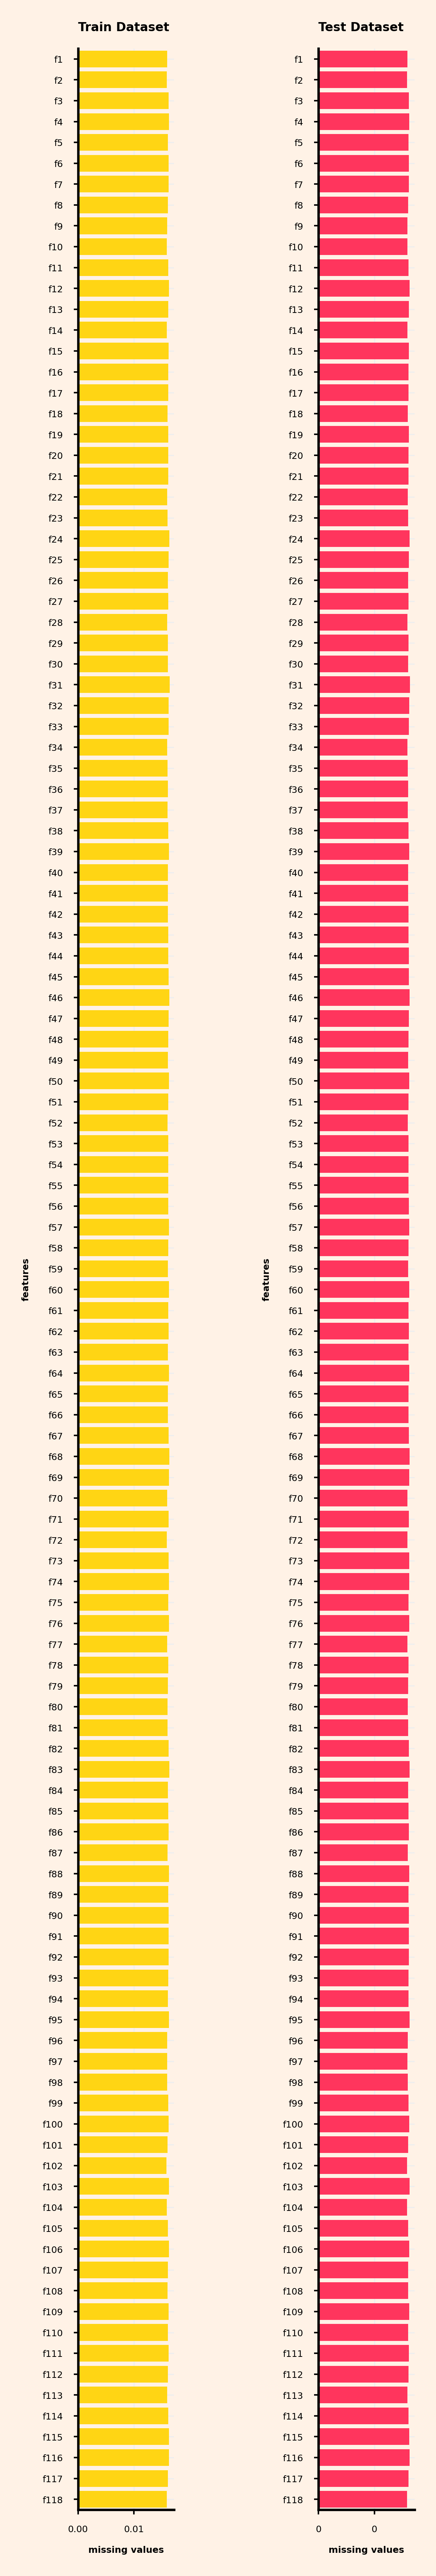

In [ ]:
plt.rcParams['figure.dpi'] = 600 # dpi는 인치당 도트 수, default = 100, dpi가 클수록 고해상도지만, 그림이 확대되고 잘리기도 함.
fig = plt.figure(figsize = (2, 15), facecolor = '#FFF2E6') # facecolor = backgroundcolor
gs = fig.add_gridspec(1,2) # gridspec: 잘 안보이는 그래프를 좀 더 줌해서 보여주는 기능, 작은 값에 대해 표현력 올라감.
gs.update(wspace = 1.5, hspace = 0.05) # update the subplot parameters of the grid. 

# background_color = '#f6f5f5'
background_color = '#FFF2E6'
sns.set_palette(['#ffd514']*120)

ax0 = fig.add_subplot(gs[0,0])
for s in ["right", "top"]:
  ax0.spines[s].set_visible(False)
  # spines: 축을 커스터마이징 하는 데 사용되는 객체
ax0.set_facecolor(background_color) # background color 지정
ax0_sns = sns.barplot(ax = ax0, y=missing_train_df.index, x = missing_train_df['percent'],
                      zorder=2, linewidth=0, orient='h', saturation=1, alpha=1) 
ax0_sns.set_xlabel("missing values", fontsize=3, weight='bold')
ax0_sns.set_ylabel("features", fontsize=3, weight='bold')
ax0_sns.tick_params(labelsize=3, width=0.5, length = 1.5)
ax0_sns.grid(which='major', axis='x', zorder=0, color = "#EEEEEE", linewidth=0.4)
ax0_sns.grid(which='major', axis='y', zorder=0, color = "#EEEEEE", linewidth=0.4)
ax0.text(0, -1.8, 'Train Dataset', fontsize=4, ha='left', va='top', weight='bold')

# ax0.get_xaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), '.')))

# data label
for p in ax0.patches:
  value = f'{p.get_width():,.0f} | {(p.get_width()/train.shape[0]):,.1%}'
  x = p.get_x() + p.get_width() + 1000
  y = p.get_x() + p.get_height() / 2
  # ax0.text(x, y, value, ha = 'left', va = 'center', fontsize=2, 
  #          bbox = dict(facecolor = 'none', edgecolor = 'black', boxstyle = 'round', linewidth = 0.2))



####################################
sns.set_palette(['#ff355d']*120)

ax3 = fig.add_subplot(gs[0, 1])
for s in ["right", "top"]:
    ax3.spines[s].set_visible(False)
ax3.set_facecolor(background_color)
ax3_sns = sns.barplot(ax=ax3, y=missing_train_df.index, x = missing_train_df['percent'], 
                      zorder=2, linewidth=0, orient='h', saturation=1, alpha=1)
ax3_sns.set_xlabel("missing values",fontsize=3, weight='bold')
ax3_sns.set_ylabel("features",fontsize=3, weight='bold')
ax3_sns.tick_params(labelsize=3, width=0.5, length=1.5)
ax3_sns.grid(which='major', axis='x', zorder=0, color='#EEEEEE', linewidth=0.4)
ax3_sns.grid(which='major', axis='y', zorder=0, color='#EEEEEE', linewidth=0.4)
ax3.text(0, -1.8, 'Test Dataset', fontsize=4, ha='left', va='top', weight='bold')

ax3.get_xaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
# # data label
# for p in ax3.patches:
#     value = f'{p.get_width():,.0f} | {(p.get_width()/test.shape[0]):,.1%}'
#     x = p.get_x() + p.get_width() + 500
#     y = p.get_y() + p.get_height() / 2 
#     ax3.text(x, y, value, ha='left', va='center', fontsize=2, 
#             bbox=dict(facecolor='none', edgecolor='black', boxstyle='round', linewidth=0.2))



## Spines Method
1. 축 없애기 
- spines['원하는 위치'].set_visible(False)  <br/>
 <br/>
2. 축 위치변경 : default = 'left'
- spines['원하는 위치'].set_position('center') <br/>
<br/>

3. 축 두께변경
- spines['원하는 위치'].set_linewidth(숫자)<br/>
<br/>

4. 축 투명도 변경
- spines['원하는 위치'].set_alpha(숫자)<br/>
<br/>

5. 축 컬러 변경
- spines['원하는 위치'].set_color('컬러')


### Row basis

In [ ]:
background_color = '#FFF2E6'

plt.rcParams['figure.dpi'] = 600
fig = plt.figure(figsize=(6,2), facecolor='#FFF2E6')
gs = fig.add_gridspec(1,2)
gs.update(wspace=03, hspace=0.3)

run_no = 0

for row in range(0,1):
  for col in range(0,2):
    locals()

In [ ]:
locals()

{'In': ['',
  "import numpy as np\nimport pandas as pd\nimport seaborn as sns\nimport matplotlib.pyplot as plt\nget_ipython().magic('matplotlib inline')\n\n# import os\n# import joblib\n# import warnings\n# warnings.filterwarnings('ignore')\n\n# import matplotlib\n# from matplotlib import ticker\n\n# pd.set_option('display.max_rows', None)\n# pd.set_option('display.max_columns', None)\n# pd.set_option('float_format', '{:f}'.format)",
  "from google.colab import drive\ndrive.mount('/content/drive')",
  "train_path = '/content/drive/MyDrive/DATA/Kaggle_TPS09/train.csv'\ntest_path = '/content/drive/MyDrive/DATA/Kaggle_TPS09/test.csv'\nsample_path = '/content/drive/MyDrive/DATA/Kaggle_TPS09/sample_solution.csv'\n\ntrain = pd.read_csv(train_path)\ntest = pd.read_csv(test_path)\nsample_submission = pd.read_csv(sample_path)",
  "target = train['claim']\n\ntrain.drop(columns = ['id', 'claim'], inplace = True)\ntest.drop(columns = 'id', inplace = True)",
  "# missing values percentage df에 담기\n\

In [ ]:
somthing = 123213

In [ ]:
def test(x):
  locals()['v'] = x + 10
  print(locals()['x'])
  return locals()['v']

print(test(100))

100
110


In [ ]:
def testt(x):
  locals()['somthing'] = 123

  print(locals())
  v = x + 10
  print(x)
  return v

print(testt(100))

{'x': 100, 'somthing': 123}
100
110


In [ ]:
def testtt(x):
  locals()['somthiqweqweng'] = 123
  asdf = 123
  for i in range(10):
    f'{i}asd' = i+1
  print(locals())
  v = x + 10
  print(x)
  return v

print(testtt(100))

SyntaxError: ignored

- reference : Kaggle 
TPS September 2021 EDA

https://www.kaggle.com/dwin183287/tps-september-2021-eda